## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
MAX_ROWS = 8
pd.options.display.max_rows = MAX_ROWS

features = pd.read_csv('feature.csv')
features 

,id,shape,x,y,w,h,col,rgb
0,b104,rect,0,0,146,13,white,#ced2ca
1,b104,rect,151,0,576,13,gray,#a4a7a7
2,b104,rect,732,0,278,129,gray,#c8c9c7
3,b104,rect,0,18,146,468,white,#cfd0ce
...,...,...,...,...,...,...,...,...
3200,b296,v-line,49,508,19,79,black,#000000
3201,b296,h-line,0,268,711,19,black,#000000
3202,b296,h-line,0,489,711,19,black,#000000
3203,b296,h-line,0,679,11,28,black,#000000


In [3]:
info = pd.read_csv('info.csv')
pd.options.display.max_rows = MAX_ROWS
info


,id,year,title,w,h
0,b104,1920,No. VI,1010,1007
1,b105,1920,Composition A,918,900
2,b106,1920,Composition B,575,677
3,b107,1920,Composition C,610,603
...,...,...,...,...,...
132,b293,1939,"Composition of red, blue and white: II",330,435
133,b294,1939,Trafalgar Square,1200,1452
134,b295,1939,Composition no. 8,681,752
135,b296,1940,Composition no. 11,711,825


In [4]:
pd.options.display.max_rows = MAX_ROWS
sizes = features.groupby('id').size()
sizes 

id
b104    41
b105    42
b106    41
b107    44
        ..
b293    26
b294    62
b295    47
b296    49
Length: 136, dtype: int64

In [5]:
complexity = sizes.reset_index(name='complexity')
complexity

,id,complexity
0,b104,41
1,b105,42
2,b106,41
3,b107,44
...,...,...
132,b293,26
133,b294,62
134,b295,47
135,b296,49


In [6]:
finfo = info.merge(complexity, on='id', how='left')
finfo.to_csv('fullinfo.csv', index=False)

In [7]:
fullinfo = pd.read_csv('fullinfo.csv')
fullinfo

,id,year,title,w,h,complexity
0,b104,1920,No. VI,1010,1007,41
1,b105,1920,Composition A,918,900,42
2,b106,1920,Composition B,575,677,41
3,b107,1920,Composition C,610,603,44
...,...,...,...,...,...,...
132,b293,1939,"Composition of red, blue and white: II",330,435,26
133,b294,1939,Trafalgar Square,1200,1452,62
134,b295,1939,Composition no. 8,681,752,47
135,b296,1940,Composition no. 11,711,825,49


<Axes: xlabel='year', ylabel='complexity'>

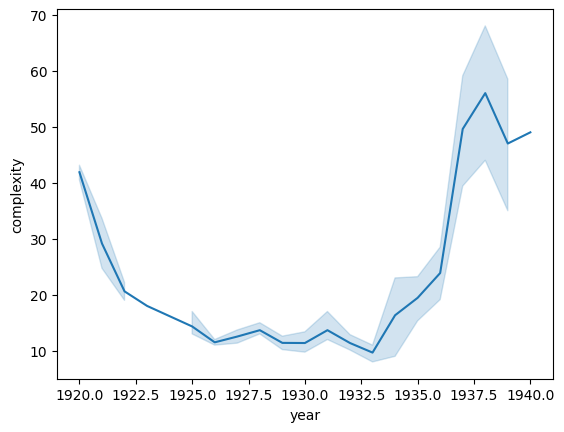

In [8]:
sns.lineplot(data=fullinfo, x='year', y='complexity')

In [ ]:
fullinfo.head()

In [ ]:
sns.lineplot(data=fullinfo, x='year', y='complexity')

In [13]:
attr= 'size'


tst_dct = fullinfo[['id', 'w', 'h']]
tst_dct.to_csv(f'{attr}.csv', index=False)
tst_dct.head(9)

,id,w,h
0,b104,1010,1007
1,b105,918,900
2,b106,575,677
3,b107,610,603
...,...,...,...
5,b109,564,630
6,b113,651,753
7,b114,610,525
8,b115,500,800


In [16]:
clrz = features['rgb'].unique()
clrz.size

1210

In [20]:
features[['id', 'rgb']].value_counts()

features['rgb'].value_counts().to_csv('clrz_cnt')